## Import Scripts and Module

In [2]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("chinmay4400/birds-hd5")

# Print the actual downloaded path
print("Downloaded dataset path:", path)


/Users/userd/miniconda3/envs/final/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Downloaded dataset path: /Users/userd/.cache/kagglehub/datasets/chinmay4400/birds-hd5/versions/1


## Data cleaning

In [4]:
import torch
import easydict
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [6]:
sys.path.append(os.path.abspath("model"))  # Add 'model' directory to the path
# Add 'src' directory to Python path
sys.path.append(os.path.abspath("src"))


In [7]:
# Import Trainer
from trainer import Trainer

# Set device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Running on:", device)

# Training arguments
args = easydict.EasyDict({
    'type': 'gan',
    'lr': 0.0002,
    'l1_coef': 50,
    'l2_coef': 100,
    'cls': True,
    'save_path': './birds_results',
    'pre_trained_disc': None,
    'pre_trained_gen': None,
    'dataset': 'birds',
    'split': 0,
    'batch_size': 64,
    'num_workers': 0,  # No multiprocessing for Jupyter
    'epochs': 10,
    'device': device
})

# Initialize Trainer
trainer = Trainer(type=args.type,
                  dataset=args.dataset,
                  split=args.split,
                  lr=args.lr,
                  save_path=args.save_path,
                  l1_coef=args.l1_coef,
                  l2_coef=args.l2_coef,
                  pre_trained_disc=args.pre_trained_disc,
                  pre_trained_gen=args.pre_trained_gen,
                  batch_size=args.batch_size,
                  num_workers=args.num_workers,
                  epochs=args.epochs,
                  device=args.device)

# Train the model
trainer.train(args.cls)


Running on: mps
Trainer initialized with device: mps
Epoch: 0, Iter: 5, d_loss= 3.173051, g_loss= 27.866859, D(X)= 0.135463, D(G(X))= 0.364595
Epoch: 0, Iter: 10, d_loss= 2.370715, g_loss= 30.180706, D(X)= 0.277157, D(G(X))= 0.355882
Epoch: 0, Iter: 15, d_loss= 2.081535, g_loss= 31.472912, D(X)= 0.376171, D(G(X))= 0.350990
Epoch: 0, Iter: 20, d_loss= 2.583714, g_loss= 30.493856, D(X)= 0.312100, D(G(X))= 0.356735
Epoch: 0, Iter: 25, d_loss= 2.062133, g_loss= 28.307123, D(X)= 0.273928, D(G(X))= 0.114806
Epoch: 0, Iter: 30, d_loss= 2.054270, g_loss= 27.910105, D(X)= 0.300657, D(G(X))= 0.143916
Epoch: 0, Iter: 35, d_loss= 2.029007, g_loss= 25.847244, D(X)= 0.270971, D(G(X))= 0.176497
Epoch: 0, Iter: 40, d_loss= 2.039819, g_loss= 26.240488, D(X)= 0.271566, D(G(X))= 0.088118
Epoch: 0, Iter: 45, d_loss= 2.030514, g_loss= 25.822937, D(X)= 0.505059, D(G(X))= 0.280721
Epoch: 0, Iter: 50, d_loss= 1.883200, g_loss= 23.256538, D(X)= 0.298133, D(G(X))= 0.166961
Epoch: 0, Iter: 55, d_loss= 2.374471, 

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved training logs
logs = np.load('training_logs.npz')

# Extract data
d_losses = logs['d_losses']  # Discriminator loss
g_losses = logs['g_losses']  # Generator loss
d_x = logs['d_x']            # Real image confidence (D(X))
d_gx = logs['d_gx']          # Fake image confidence (D(G(X)))

print("Training logs loaded successfully!")


Training logs loaded successfully!


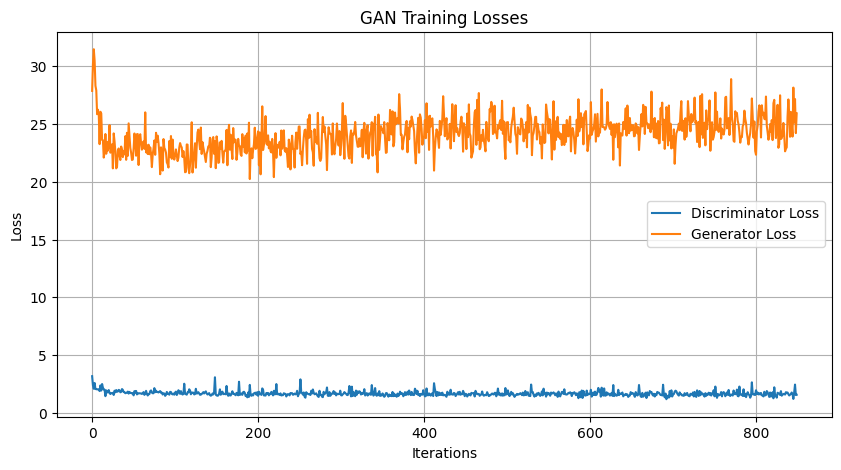

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="Generator Loss")
plt.title("GAN Training Losses")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


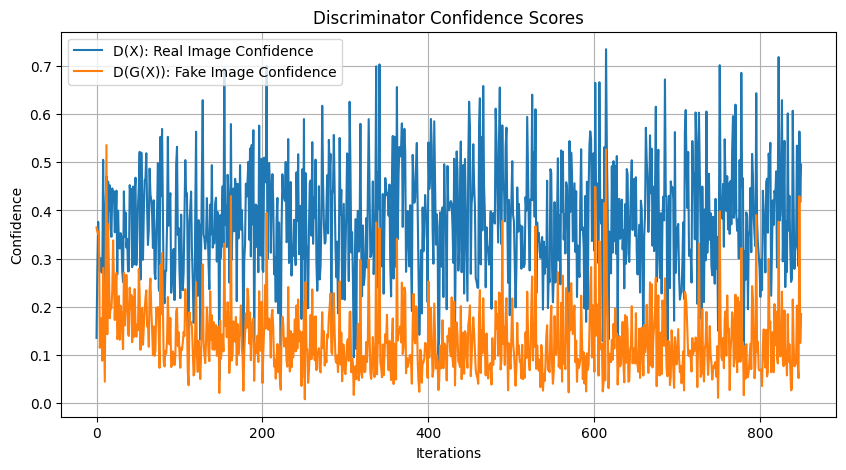

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(d_x, label="D(X): Real Image Confidence")
plt.plot(d_gx, label="D(G(X)): Fake Image Confidence")
plt.title("Discriminator Confidence Scores")
plt.xlabel("Iterations")
plt.ylabel("Confidence")
plt.legend()
plt.grid()
plt.show()
